The location and the name of the data file is indicated here:

In [1]:
datafile = "~/CMEMS_INSTAC/INSITU_MED_NRT_OBSERVATIONS_013_035/history/mooring/IR_TS_MO_61198.nc"

In [2]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import dates
import numpy as np
import os

## Read variables and units 

In [3]:
datafile = os.path.expanduser(datafile)
print datafile

/home/ctroupin/CMEMS_INSTAC/INSITU_MED_NRT_OBSERVATIONS_013_035/history/mooring/IR_TS_MO_61198.nc


In [4]:
with netCDF4.Dataset(datafile, 'r') as ds:
    time_values = ds.variables['TIME'][:]
    temperature_values = ds.variables['TEMP'][:]
    temperatureQC = ds.variables['TEMP_QC'][:]
    time_units = ds.variables['TIME'].units
    temperature_units = ds.variables['TEMP'].units
    time2 = netCDF4.num2date(time_values, time_units)

## Basic plot

### No quality control applied

We create the most simple plot, without any additional option. Data are taken as they are, whatever their quality.

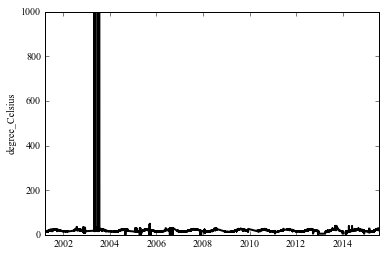

In [14]:
fig = plt.figure()
plt.plot(time2, temperature_values)
plt.ylabel(temperature_units)

Obvisouly something has to be done, as some values are out of range for a temperature.

### 4.2.2 Quality control applied

We also [mask](http://docs.scipy.org/doc/numpy/reference/maskedarray.html) the temperature values that have quality flag not equal to 1.

In [15]:
temperature_values = np.ma.masked_where(temperatureQC != 1, temperature_values)

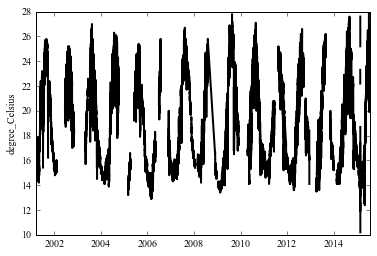

In [20]:
fig = plt.figure()
plt.plot(time2, temperature_values)
plt.ylabel(temperature_units)
plt.show()

Now it looks better, but:
* The figure is not large enough.
* The labels are too small.

Let's have a closer look to the Quality Flags:

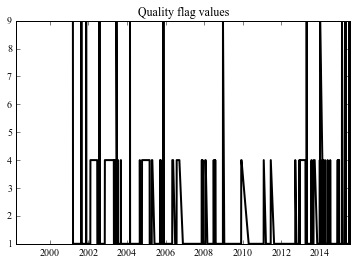

In [21]:
fig = plt.figure()
plt.plot(time2, temperatureQC)
plt.title('Quality flag values')
plt.show()

We can cound the number of occurence of each value of the QF:

In [22]:
np.bincount(temperatureQC[:,0])

array([    0, 91451,     0,     0,  8966,     0,     0,     0,     0, 19499])

which means that
* 91451 measurements have a QF = 1 (good data),
* 8966 measurements have a QF = 4 (bad data),
* 19499 measurements have a QF = 9 (missing value).  

## Improved plot

With some commands the previous plots can be improved:
* The figure size is increased
* The font size is set to 20 (pts)
* The year labels are rotated 45º

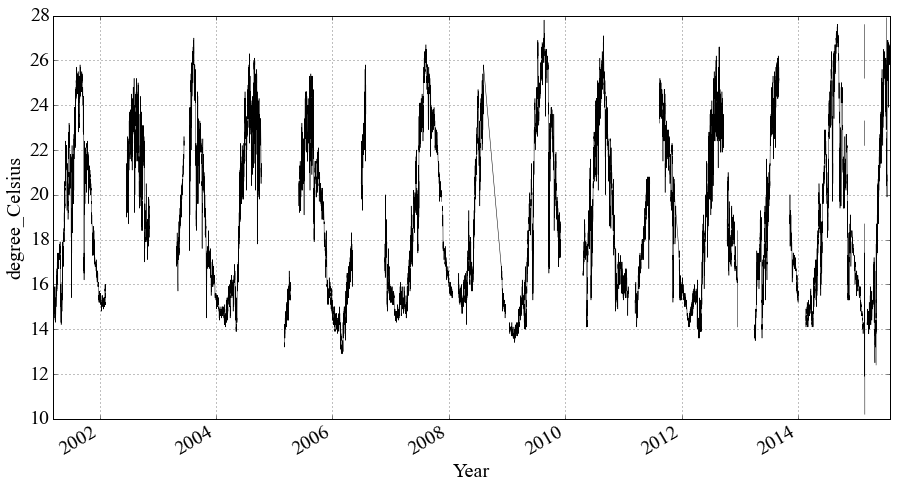

In [24]:
mpl.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.plot(time2, temperature_values, linewidth=0.5)
plt.ylabel(temperature_units)
plt.xlabel('Year')
fig.autofmt_xdate()
plt.grid()
plt.show()

## Final version

We want to add a title containing the coordinates of the station. Longitude and latitude are both stored as vectors, but we will only keep the mean position to be included in the title.

LaTeX syntax can be used, as in this example, with the *degree* symbol.

In [27]:
with netCDF4.Dataset(datafile, 'r') as ds:
    lon = ds.variables['LONGITUDE'][:]
    lat = ds.variables['LATITUDE'][:]
figure_title = r'Temperature evolution at %s E, %s N' % (lon.mean(), lat.mean())
print figure_title

Temperature evolution at -2.33189 E, 36.5698 N


The units for the temperature are also changed:

In [28]:
temperature_units2 = '($^{\circ}$C)'

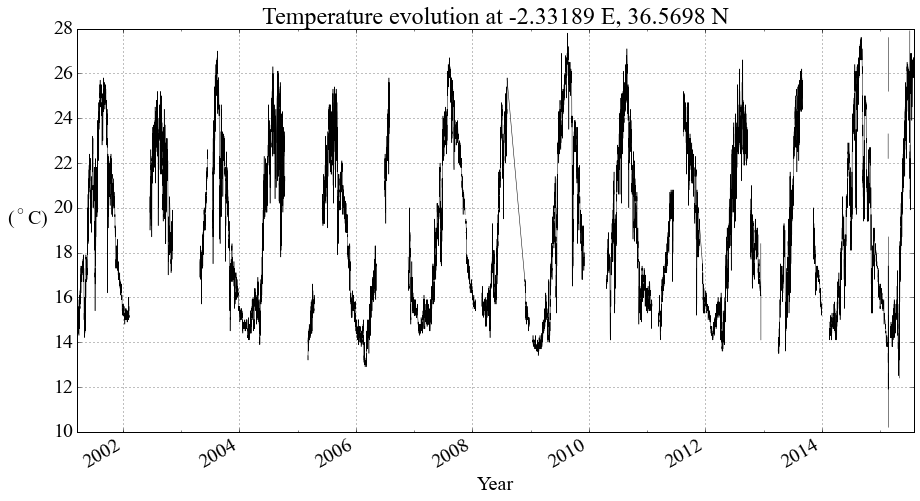

In [30]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(dates.YearLocator(base=2))
ax.xaxis.set_minor_locator(dates.YearLocator())
plt.plot(time2, temperature_values, linewidth=0.5)
plt.ylabel(temperature_units2, rotation=0., horizontalalignment='right')
plt.title(figure_title)
plt.xlabel('Year')
fig.autofmt_xdate()
plt.grid()
plt.show()